## Get Data

In [1]:
import pandas as pd

df = pd.read_csv("../cleaned_dataset.csv")
df

,Unnamed: 0,Year,Month,Day,Dew Point Temp.,Mean Temperature,Max Temperature,Min Temperature,Mean Cloud,Mean Pressure,...,Total Sunlight,Wind Speed,Day of Year,SO2,NOX,NO2,CO,RSP,O3,FSP
0,0,1991,4,1,9.4,15.4,19.3,12.1,57.0,1025.1,...,7.1,7.851941,91,42.0,218.0,70.0,147.0,56.0,33.0,37.0
1,1,1991,4,2,10.8,16.6,19.1,14.9,79.0,1025.8,...,3.4,9.920213,92,48.0,269.0,99.0,154.0,56.0,36.0,37.0
2,2,1991,4,3,11.6,17.5,19.8,15.8,53.0,1023.0,...,8.8,10.066439,93,41.0,242.0,98.0,124.0,54.0,37.0,35.0
3,3,1991,4,4,14.6,18.5,21.4,16.5,89.0,1018.7,...,1.3,9.610053,94,45.0,271.0,98.0,132.0,45.0,25.0,30.0
4,4,1991,4,5,17.1,19.7,21.0,18.8,90.0,1014.7,...,1.8,11.099544,95,32.0,221.0,89.0,112.0,38.0,23.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157,12157,2024,10,27,22.0,27.3,29.2,25.9,77.0,1009.3,...,3.3,12.200000,301,3.0,75.0,49.0,49.0,24.0,30.0,18.0
12158,12158,2024,10,28,19.2,25.8,27.2,24.6,83.0,1010.1,...,0.3,9.700000,302,3.0,100.0,53.0,60.0,16.0,28.0,11.0
12159,12159,2024,10,29,19.1,25.3,26.7,23.7,86.0,1011.1,...,1.7,8.400000,303,3.0,104.0,61.0,56.0,19.0,31.0,14.0
12160,12160,2024,10,30,18.7,26.2,29.3,24.3,70.0,1010.3,...,7.8,8.300000,304,4.0,136.0,77.0,60.0,28.0,36.0,20.0


In [2]:
from sklearn.model_selection import train_test_split

df['Next Rainfall'] = df['Rainfall'].shift(-1)
df.dropna(inplace=True)
df = df.drop(columns=["Rainfall"])

tem_train, tem_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=False)

X_train = tem_train.drop(columns=["Next Rainfall"])
y_train = tem_train["Next Rainfall"]

X_test = tem_test.drop(columns=["Next Rainfall"])
y_test = tem_test["Next Rainfall"]

## Modeling

In [3]:
## doing the linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

RMSE: 21.03
R2: 0.12


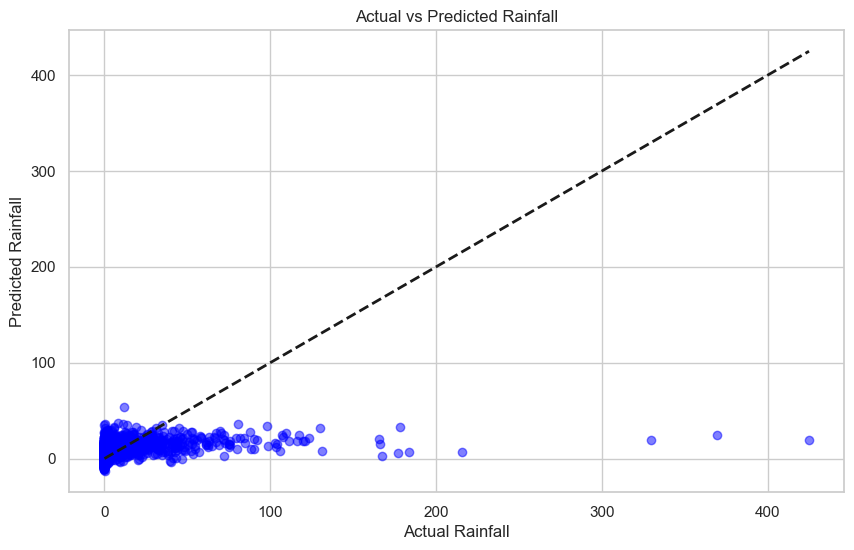

In [4]:
# plot the predictions vs the actual values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.show()

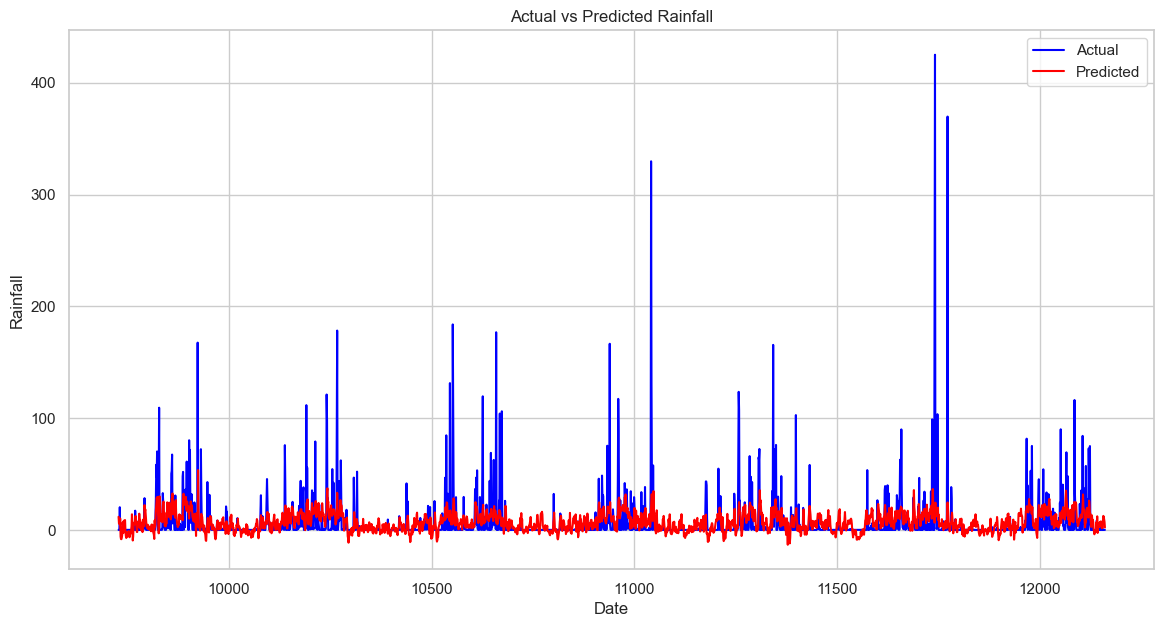

In [5]:
# time series plot
plt.figure(figsize=(14, 7))
plt.plot(tem_test.index, y_test, label='Actual', color='blue')
plt.plot(tem_test.index, y_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.legend()
plt.show()


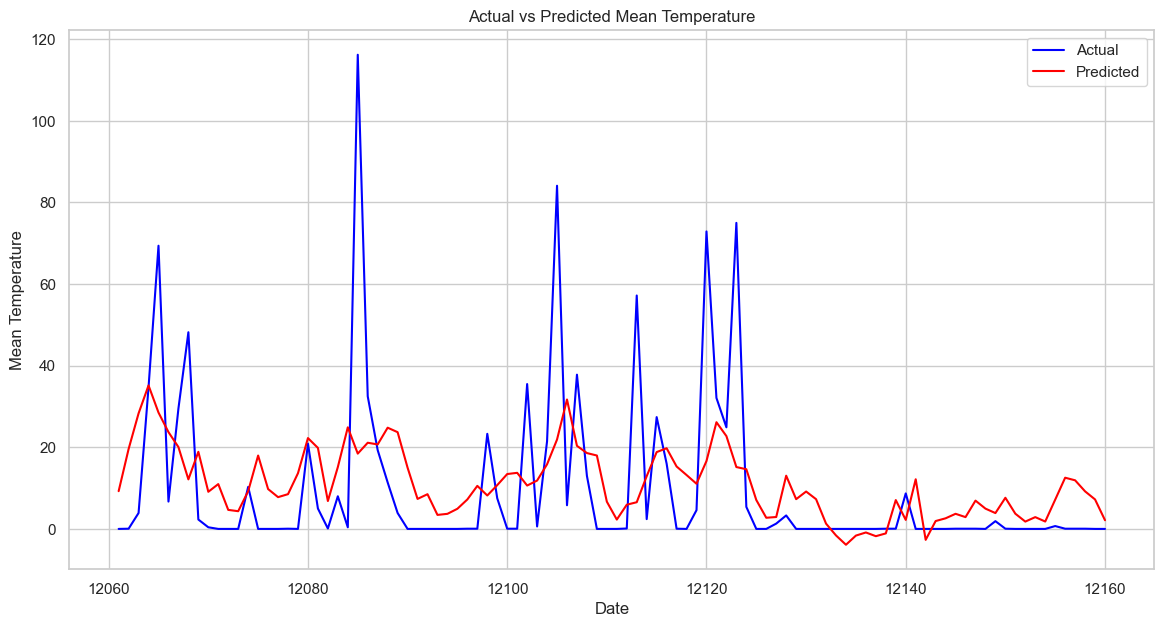

In [6]:
# time series plot last 10 days
plt.figure(figsize=(14, 7))
plt.plot(tem_test.index[-100:], y_test[-100:], label='Actual', color='blue')
plt.plot(tem_test.index[-100:], y_pred[-100:], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Actual vs Predicted Mean Temperature')
plt.legend()
plt.show()